In [110]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapefile as shp
import seaborn as sns
from statistics import mean

#sns.set(style='whitegrid', palette='pastel', color_codes=True)
#sns.mpl.rc('figure', figsize=(10,6))

In [161]:
FCC_df = pd.read_csv(r'C:\Users\Ping\Desktop\Ping\DataKind_Data_Dive_Broadband_Access\fcc_477_census_tract_NY.csv')

<AxesSubplot:>

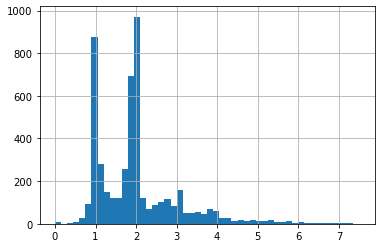

In [4]:
FCC_df['dn100'].hist(bins = 50)
# Observation that FCC dn100 etc. fields have a discrete quality - suggesting tendency to uniformity across each census tract?

In [132]:
ookla_df = pd.read_csv(r'C:\Users\Ping\Desktop\Ping\DataKind_Data_Dive_Broadband_Access\ookla_combined_ny.csv') 
ookla_df.head 
ookla_df.columns 
ookla_df.size

8450649

In [138]:
# Remove NaN's but in this case there don't appear to be any
ookla_df1 = ookla_df[:][ookla_df.avg_d_kbps.isnull()==False]

# Manual weighted average by devices
ookla_df1.loc[:,'temp1'] = ookla_df1.avg_d_kbps*ookla_df1.devices
GEOIDs = ookla_df.GEOID.unique()
d_kbps = [None]*len(GEOIDs)
n_quadkeys = [None]*len(GEOIDs)
for ind in range(0,len(GEOIDs)):
    sub = ookla_df1[ookla_df1['GEOID']==GEOIDs[ind]]
    n_quadkeys[ind] = len(sub)
    if sub['temp1'].sum()==0 :
        d_kbps[ind] = 0     # to prevent divide by zero
    else:        
        d_kbps[ind] = sub['temp1'].sum()/sub['devices'].sum()    
    

In [162]:
mean(n_quadkeys)

114.30763299922899

In [163]:
list_of_tuples = list(zip(GEOIDs, d_kbps))
GEOID_d_kbps = pd.DataFrame(list_of_tuples, columns = ['GEOID','avg_avg_d_kbps'])

In [164]:
GEOID_d_kbps

,GEOID,avg_avg_d_kbps
0,36103170202,156808.183932
1,36063024502,162651.432359
2,36047092400,210133.765027
3,36029014702,124677.289109
4,36029007302,125097.184773
...,...,...
3886,36055009200,105425.000000
3887,36005000100,89711.600000
3888,36055980100,29666.000000
3889,36081049200,47160.000000
